# Librairies


In [3]:
import pandas as pd

In [4]:
import requests

In [7]:
!apt update
!apt upgrade
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:6 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [62.9 kB]
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
import json

#import rtree

from shapely.geometry import Point
from shapely.ops import transform

from IPython.display import display

# Points d'arrêts des stations de transport

Les points d’arrêts du réseau TCL sont des objets ponctuels qui localisent les stations de Métro, Tramway et les arrêts de Bus.
Le point d’arrêt est caractérisé par des informations de gestion (numéro du point d’arrêt, nom commercial, liste des lignes de desserte avec leur sens, accessibilité PMR, présence d’ascenseur ou d’escalier mécanique, coordonnées  x/y).

https://data.grandlyon.com/jeux-de-donnees/points-arret-reseau-transports-commun-lyonnais/**info**

In [14]:
link='https://download.data.grandlyon.com/ws/rdata/tcl_sytral.tclarret/all.json?maxfeatures=-1'
r = requests.get(link).json()


In [15]:
point_arret=pd.json_normalize(r['values'])
point_arret.head()

,nom,escalator,pmr,desserte,last_update,ascenseur,gid,last_update_fme,id
0,Quatre Chemins,False,True,147:R,2021-08-05 02:31:22,False,10617,2021-08-05 06:00:16,2560
1,Charmettes,False,True,C16A:A,2021-08-05 02:31:22,False,824,2021-08-05 06:00:15,50
2,Ampere,False,False,S3B:A,2021-08-05 02:31:22,False,10529,2021-08-05 06:00:15,55
3,Anatole France,False,True,39A:R,2021-08-05 02:31:22,False,9567,2021-08-05 06:00:15,58
4,Andre Boulloche,False,True,93A:A,2021-08-05 02:31:22,False,9543,2021-08-05 06:00:15,64


In [ ]:
point_arret.shape

(4692, 9)

In [ ]:
point_arret.describe()

,gid,id
count,4692.000000,4692.000000
mean,4169.249361,23271.309676
std,3249.453623,19131.262229
min,2.000000,1.000000
25%,1580.750000,2327.750000
50%,3324.500000,30228.000000
75%,5463.250000,43039.750000
max,11047.000000,47856.000000


Récupérer le fichier pointd'arrêt en geojson

In [11]:
# Une methode de "geopandas" permet de transformer en DataFrame des pages de données "raw".
link='https://download.data.grandlyon.com/wfs/rdata?SERVICE=WFS&VERSION=2.0.0&request=GetFeature&typename=tcl_sytral.tclarret&outputFormat=application/json;%20subtype=geojson&SRSNAME=EPSG:4171'
point_arret2 = gpd.read_file(link)
point_arret2.head(20)

,id,nom,desserte,pmr,ascenseur,escalator,gid,last_update,last_update_fme,geometry
0,2560,Quatre Chemins,147:R,true,false,false,10617,2021-08-05T02:31:22,2021-08-05T06:00:16,POINT (4.69050 45.73994)
1,50,Charmettes,C16A:A,true,false,false,824,2021-08-05T02:31:22,2021-08-05T06:00:15,POINT (4.86870 45.76332)
2,55,Ampere,S3B:A,false,false,false,10529,2021-08-05T02:31:22,2021-08-05T06:00:15,POINT (4.83861 45.81707)
3,58,Anatole France,39A:R,true,false,false,9567,2021-08-05T02:31:22,2021-08-05T06:00:15,POINT (4.89424 45.72203)
4,64,Andre Boulloche,93A:A,true,false,false,9543,2021-08-05T02:31:22,2021-08-05T06:00:15,POINT (4.93038 45.71899)
5,73,Aqueducs de Beaunant,"11B:R,12B:R,14B:R",false,false,false,10656,2021-08-05T02:31:22,2021-08-05T06:00:15,POINT (4.77996 45.72432)
6,140,Batterie,24A:R,true,false,false,10702,2021-08-05T02:31:22,2021-08-05T06:00:15,POINT (4.91574 45.74448)
7,197,Berthaudiere,67A:R,true,false,false,10769,2021-08-05T02:31:22,2021-08-05T06:00:15,POINT (4.96966 45.77552)
8,697,Decines Champ Fleuri,67A:A,true,false,false,10770,2021-08-05T02:31:22,2021-08-05T06:00:15,POINT (4.97232 45.77370)
9,753,Diderot,C7B:R,true,false,false,9018,2021-08-05T02:31:22,2021-08-05T06:00:15,POINT (4.80909 45.71330)


In [ ]:
type(point_arret2)

geopandas.geodataframe.GeoDataFrame

In [16]:
pt_arrets=pd.DataFrame(point_arret2)
type(pt_arrets)


pandas.core.frame.DataFrame

In [ ]:
test=pt_arrets['desserte'].str.split(',',expand=True)
test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,C16A:A,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,S3B:A,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,39A:R,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,93A:A,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,C15E:A,C15E:R,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4686,112A:A,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4687,112A:R,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4688,29A:A,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4689,24A:A,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [17]:
#separer la colonne desserte
#selection de seulement la première ligne desservie
pt_arrets['desserte_unique']=pt_arrets['desserte'].str.split(',',expand=True)[0]
pt_arrets.head()

,id,nom,desserte,pmr,ascenseur,escalator,gid,last_update,last_update_fme,geometry,desserte_unique
0,2560,Quatre Chemins,147:R,true,false,false,10617,2021-08-05T02:31:22,2021-08-05T06:00:16,POINT (4.69050 45.73994),147:R
1,50,Charmettes,C16A:A,true,false,false,824,2021-08-05T02:31:22,2021-08-05T06:00:15,POINT (4.86870 45.76332),C16A:A
2,55,Ampere,S3B:A,false,false,false,10529,2021-08-05T02:31:22,2021-08-05T06:00:15,POINT (4.83861 45.81707),S3B:A
3,58,Anatole France,39A:R,true,false,false,9567,2021-08-05T02:31:22,2021-08-05T06:00:15,POINT (4.89424 45.72203),39A:R
4,64,Andre Boulloche,93A:A,true,false,false,9543,2021-08-05T02:31:22,2021-08-05T06:00:15,POINT (4.93038 45.71899),93A:A


In [18]:
#enlever le A et R de la colonne desserte_unique
pt_arrets['desserte_unique']=pt_arrets['desserte_unique'].str.replace(':A', '')
pt_arrets['desserte_unique']=pt_arrets['desserte_unique'].str.replace(':R', '')
pt_arrets.head()

,id,nom,desserte,pmr,ascenseur,escalator,gid,last_update,last_update_fme,geometry,desserte_unique
0,2560,Quatre Chemins,147:R,true,false,false,10617,2021-08-05T02:31:22,2021-08-05T06:00:16,POINT (4.69050 45.73994),147
1,50,Charmettes,C16A:A,true,false,false,824,2021-08-05T02:31:22,2021-08-05T06:00:15,POINT (4.86870 45.76332),C16A
2,55,Ampere,S3B:A,false,false,false,10529,2021-08-05T02:31:22,2021-08-05T06:00:15,POINT (4.83861 45.81707),S3B
3,58,Anatole France,39A:R,true,false,false,9567,2021-08-05T02:31:22,2021-08-05T06:00:15,POINT (4.89424 45.72203),39A
4,64,Andre Boulloche,93A:A,true,false,false,9543,2021-08-05T02:31:22,2021-08-05T06:00:15,POINT (4.93038 45.71899),93A


In [59]:
pt_arrets[pt_arrets["nom"].str.contains("Terreaux")]

,id,nom,desserte,pmr,ascenseur,escalator,gid,last_update,last_update_fme,geometry,desserte_unique
1159,46307,Terreaux La Feuillee,"19A:A,C14A:A,C3A:R,PL2A:A,PL3A:A,S1A:A",true,false,false,5283,2021-08-05T02:31:22,2021-08-05T06:00:18,POINT (4.83121 45.76732),19A
1178,46289,Terreaux La Feuillee,"19A:R,C14A:A,C14A:R,C3A:A,PL1A:A,PL1A:R,S1A:R",true,false,false,5232,2021-08-05T02:31:22,2021-08-05T06:00:18,POINT (4.83153 45.76690),19A
1580,2991,Terreaux Tobie Robatel,"C13B:R,C18A:A,C18A:R,S12A:R,S6A:R",true,false,false,2843,2021-08-05T02:31:22,2021-08-05T06:00:16,POINT (4.83167 45.76720),C13B
3751,10691,Terreaux,S1A:R,false,false,false,2829,2021-08-05T02:31:22,2021-08-05T06:00:16,POINT (4.83292 45.76646),S1A
4433,35054,Terreaux Tobie Robatel,"C13B:A,C18A:A,S6A:A",true,false,false,2842,2021-08-05T02:31:22,2021-08-05T06:00:17,POINT (4.83143 45.76789),C13B


In [24]:
#liste des lignes metro et funiculaire, avec aller/retour
list_metro=metro.iloc[:,2].unique().tolist()
list_metro

['326', '301A', '304', '303', '302A', '325']

In [25]:
#selection des points d'arrêts pour les lignes de metro et funiculaires
pt_arrets_metro=pt_arrets[pt_arrets['desserte_unique'].isin(list_metro)]
pt_arrets_metro.head()

,id,nom,desserte,pmr,ascenseur,escalator,gid,last_update,last_update_fme,geometry,desserte_unique
362,46030,Place Jean Jaurès,302A:A,true,false,false,322,2021-08-05T02:31:22,2021-08-05T06:00:18,POINT (4.83756 45.73782),302A
363,46031,Debourg,302A:A,true,false,false,316,2021-08-05T02:31:22,2021-08-05T06:00:18,POINT (4.83392 45.73196),302A
364,46032,Debourg,302A:R,true,false,false,321,2021-08-05T02:31:22,2021-08-05T06:00:18,POINT (4.83402 45.73192),302A
389,644,Croix-Rousse,"303:A,303:R",true,true,true,338,2021-08-05T02:31:22,2021-08-05T06:00:15,POINT (4.83183 45.77446),303
428,42743,Hôtel de Ville L. Pradel,301A:R,true,false,false,118,2021-08-05T02:31:22,2021-08-05T06:00:18,POINT (4.83609 45.76731),301A


In [ ]:
pt_arrets_metro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 382 to 4362
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   id               90 non-null     object  
 1   nom              90 non-null     object  
 2   desserte         90 non-null     object  
 3   pmr              90 non-null     object  
 4   ascenseur        90 non-null     object  
 5   escalator        90 non-null     object  
 6   gid              90 non-null     object  
 7   last_update      90 non-null     object  
 8   last_update_fme  90 non-null     object  
 9   geometry         90 non-null     geometry
 10  desserte_unique  90 non-null     object  
dtypes: geometry(1), object(10)
memory usage: 8.4+ KB


In [26]:
#remettre le pandas en geopandas
pt_arrets_metro=gpd.GeoDataFrame(pt_arrets_metro,geometry='geometry')
print(type(pt_arrets_metro))
pt_arrets_metro.head()

<class 'geopandas.geodataframe.GeoDataFrame'>


,id,nom,desserte,pmr,ascenseur,escalator,gid,last_update,last_update_fme,geometry,desserte_unique
362,46030,Place Jean Jaurès,302A:A,true,false,false,322,2021-08-05T02:31:22,2021-08-05T06:00:18,POINT (4.83756 45.73782),302A
363,46031,Debourg,302A:A,true,false,false,316,2021-08-05T02:31:22,2021-08-05T06:00:18,POINT (4.83392 45.73196),302A
364,46032,Debourg,302A:R,true,false,false,321,2021-08-05T02:31:22,2021-08-05T06:00:18,POINT (4.83402 45.73192),302A
389,644,Croix-Rousse,"303:A,303:R",true,true,true,338,2021-08-05T02:31:22,2021-08-05T06:00:15,POINT (4.83183 45.77446),303
428,42743,Hôtel de Ville L. Pradel,301A:R,true,false,false,118,2021-08-05T02:31:22,2021-08-05T06:00:18,POINT (4.83609 45.76731),301A


#Les stations de metro
Code automatique qui prend en compte toute les desserte

In [13]:
#stations
link='https://download.data.grandlyon.com/ws/rdata/tcl_sytral.tclarret/all.json?maxfeatures=-1'
r = requests.get(link).json()
pt_arrets=pd.json_normalize(r['values'])
#separer la colonne desserte en 24 colonne
new=pt_arrets['desserte'].str.split(',',expand=True)
#faire une boucle pour recup les infos des 24 colonnes
tab_all= pd.DataFrame(columns=['nom', 'escalator', 'pmr', 'desserte', 'last_update', 'ascenseur',
       'gid', 'last_update_fme', 'id', 'code_ligne'])
for i in range (25):
    pt_arrets["code_ligne"]=new[i]
    tab=pt_arrets[pt_arrets["code_ligne"].notnull()]
    tab_all=pd.concat([tab_all,tab])
pt_arrets=tab_all
#rajouter une colonne sens pour savoir si aller ou retour
pt_arrets["sens"]=pt_arrets['code_ligne']
#remplacer A et R par Aller et Retour
pt_arrets['sens']=pt_arrets['sens'].str.split(':',expand=True)[1]
pt_arrets['sens']=pt_arrets['sens'].str.replace("A","Aller")
pt_arrets['sens']=pt_arrets['sens'].str.replace("R","Retour")

#enlever le A et R de la colonne code_ligne
pt_arrets['code_ligne']=pt_arrets['code_ligne'].str.replace(':A', '')
pt_arrets['code_ligne']=pt_arrets['code_ligne'].str.replace(':R', '')

pt_arrets

,nom,escalator,pmr,desserte,last_update,ascenseur,gid,last_update_fme,id,code_ligne,sens
0,Quatre Chemins,False,True,147:R,2021-08-05 02:31:22,False,10617,2021-08-05 06:00:16,2560,147,Retour
1,Charmettes,False,True,C16A:A,2021-08-05 02:31:22,False,824,2021-08-05 06:00:15,50,C16A,Aller
2,Ampere,False,False,S3B:A,2021-08-05 02:31:22,False,10529,2021-08-05 06:00:15,55,S3B,Aller
3,Anatole France,False,True,39A:R,2021-08-05 02:31:22,False,9567,2021-08-05 06:00:15,58,39A,Retour
4,Andre Boulloche,False,True,93A:A,2021-08-05 02:31:22,False,9543,2021-08-05 06:00:15,64,93A,Aller
...,...,...,...,...,...,...,...,...,...,...,...
446,Gare de Vaise,False,True,"10D:R,10E:R,115A:R,118A:R,20A:R,21A:R,22A:R,23...",2021-08-05 02:31:22,False,10585,2021-08-05 06:00:17,12045,C14A,Aller
446,Gare de Vaise,False,True,"10D:R,10E:R,115A:R,118A:R,20A:R,21A:R,22A:R,23...",2021-08-05 02:31:22,False,10585,2021-08-05 06:00:17,12045,C14A,Retour
446,Gare de Vaise,False,True,"10D:R,10E:R,115A:R,118A:R,20A:R,21A:R,22A:R,23...",2021-08-05 02:31:22,False,10585,2021-08-05 06:00:17,12045,C6E,Aller
446,Gare de Vaise,False,True,"10D:R,10E:R,115A:R,118A:R,20A:R,21A:R,22A:R,23...",2021-08-05 02:31:22,False,10585,2021-08-05 06:00:17,12045,C6E,Retour


# Les lignes de metro et funiculaire

La représentation graphique des lignes de métro et de funiculaire du réseau TCL est un objet linéaire qui localise la ligne et son parcours de terminus à terminus.
La représentation graphique des lignes est caractérisée par des informations de gestion (nom de la la ligne, code interne du tracé, code de la ligne, type de tracé, nom du tracé, sens, code et nom de l'origine et de la destination, famille de transport, date de début et de fin du tracé, code et nom du type de ligne, accessibilité PMR, trigramme de la ligne, nom de la version du tracé, date de dernière mise à jour des données) et de tracés (polylignes de terminus à terminus).





## Les informations

In [ ]:
link='https://download.data.grandlyon.com/ws/rdata/tcl_sytral.tcllignemf_2_0_0/all.json?maxfeatures=-1'
r = requests.get(link).json()
metro=pd.json_normalize(r['values'])
metro.head()

,type_trace,gid,destination,pmr,nom_type_ligne,code_type_ligne,nom_version,famille_transport,ligne,code_trace,code_ligne,origine,date_fin,nom_origine,nom_destination,sens,nom_trace,last_update_fme,last_update,code_tri_ligne,date_debut
0,NOM,23,30055,True,Régulière,REG,Avril 2021,FUN,F2,F2-1,326,30049,None,Vieux Lyon Cat.St Jean,Fourvière Basilique,Aller,Vieux Lyon - Fourviere,2021-07-29 06:00:37+02:00,2021-05-03 17:09:38+02:00,F 2,20180101
1,NOM,13,31750,True,Régulière,REG,Avril 2021,MET,A,A-1,301A,30017,None,Perrache.,Vaulx-en-Velin La Soie,Aller,Perrache - Vaulx-en-Velin La Soie,2021-07-29 06:00:37+02:00,2021-05-03 17:09:38+02:00,A,20180101
2,NOM,19,30175,True,Régulière,REG,Avril 2021,MET,D,D-1,304,30052,None,Gare de Vaise,Gare de Vénissieux,Aller,Gare de Vaise - Gare de Vénissieux,2021-07-29 06:00:37+02:00,2021-05-03 17:09:38+02:00,D,20180101
3,NOM,20,31834,True,Régulière,REG,Avril 2021,MET,D,D-2,304,31820,None,Gare de Vénissieux.,Gare de Vaise.,Retour,Gare de Vénissieux - Gare de Vaise,2021-07-29 06:00:37+02:00,2021-05-03 17:09:38+02:00,D,20180101
4,NOM,18,30021,True,Régulière,REG,Avril 2021,MET,C,C-2,303,30036,None,Cuire,Hôtel de Ville L.Pradel,Retour,Cuire - Hôtel de Ville Louis Pradel,2021-07-29 06:00:37+02:00,2021-05-03 17:09:38+02:00,C,20180101


In [ ]:
metro[metro['ligne']=="B"]

,type_trace,gid,destination,pmr,nom_type_ligne,code_type_ligne,nom_version,famille_transport,ligne,code_trace,code_ligne,origine,date_fin,nom_origine,nom_destination,sens,nom_trace,last_update_fme,last_update,code_tri_ligne,date_debut
6,NOM,16,30024,True,Régulière,REG,Avril 2021,MET,B,B-2,302A,34241,None,Gare d'Oullins.,Charpennes Charles Hernu .,Retour,Gare d'Oullins - Charpennes,2021-07-29 06:00:37+02:00,2021-05-03 17:09:38+02:00,B,20180101
11,NOM,15,34240,True,Régulière,REG,Avril 2021,MET,B,B-1,302A,30024,None,Charpennes Charles Hernu .,Gare d'Oullins,Aller,Charpennes - Gare d'Oullins,2021-07-29 06:00:37+02:00,2021-05-03 17:09:38+02:00,B,20180101


## La carte géographique des lignes et des stations

In [20]:
# Une methode de "geopandas" permet de transformer en DataFrame des pages de données "raw".
link='https://download.data.grandlyon.com/wfs/rdata?SERVICE=WFS&VERSION=2.0.0&request=GetFeature&typename=tcl_sytral.tcllignemf_2_0_0&outputFormat=application/json;%20subtype=geojson&SRSNAME=EPSG:4171'
metro = gpd.read_file(link)
metro.head(20)

,ligne,code_trace,code_ligne,type_trace,nom_trace,sens,origine,destination,nom_origine,nom_destination,famille_transport,date_debut,date_fin,code_type_ligne,nom_type_ligne,pmr,code_tri_ligne,nom_version,last_update,last_update_fme,gid,geometry
0,F2,F2-1,326,NOM,Vieux Lyon - Fourviere,Aller,30049,30055,Vieux Lyon Cat.St Jean,Fourvière Basilique,FUN,20180101,,REG,Régulière,true,F 2,Avril 2021,2021-05-03T17:09:38+02:00,2021-08-05T06:00:27+02:00,23,"LINESTRING (4.82186 45.76220, 4.82505 45.76026..."
1,A,A-1,301A,NOM,Perrache - Vaulx-en-Velin La Soie,Aller,30017,31750,Perrache.,Vaulx-en-Velin La Soie,MET,20180101,,REG,Régulière,true,A,Avril 2021,2021-05-03T17:09:38+02:00,2021-08-05T06:00:27+02:00,13,"LINESTRING (4.82687 45.74961, 4.82725 45.75002..."
2,D,D-2,304,NOM,Gare de Vénissieux - Gare de Vaise,Retour,31820,31834,Gare de Vénissieux.,Gare de Vaise.,MET,20180101,,REG,Régulière,true,D,Avril 2021,2021-05-03T17:09:38+02:00,2021-08-05T06:00:27+02:00,20,"LINESTRING (4.88800 45.70564, 4.88800 45.70646..."
3,D,D-1,304,NOM,Gare de Vaise - Gare de Vénissieux,Aller,30052,30175,Gare de Vaise,Gare de Vénissieux,MET,20180101,,REG,Régulière,true,D,Avril 2021,2021-05-03T17:09:38+02:00,2021-08-05T06:00:27+02:00,19,"LINESTRING (4.80445 45.78069, 4.80397 45.78017..."
4,C,C-2,303,NOM,Cuire - Hôtel de Ville Louis Pradel,Retour,30036,30021,Cuire,Hôtel de Ville L.Pradel,MET,20180101,,REG,Régulière,true,C,Avril 2021,2021-05-03T17:09:38+02:00,2021-08-05T06:00:27+02:00,18,"LINESTRING (4.83260 45.78532, 4.82994 45.78327..."
5,C,C-1,303,NOM,Hôtel de Ville Louis Pradel - Cuire,Aller,30021,30036,Hôtel de Ville L.Pradel,Cuire,MET,20180101,,REG,Régulière,true,C,Avril 2021,2021-05-03T17:09:38+02:00,2021-08-05T06:00:27+02:00,17,"LINESTRING (4.83607 45.76798, 4.83583 45.76903..."
6,B,B-2,302A,NOM,Gare d'Oullins - Charpennes,Retour,34241,30024,Gare d'Oullins.,Charpennes Charles Hernu .,MET,20180101,,REG,Régulière,true,B,Avril 2021,2021-05-03T17:09:38+02:00,2021-08-05T06:00:27+02:00,16,"LINESTRING (4.81522 45.71676, 4.81632 45.71692..."
7,F1,F1-1,325,NOM,Vieux Lyon - Saint-Just,Aller,30049,30054,Vieux Lyon Cat.St Jean,St Just,FUN,20180101,,REG,Régulière,true,F 1,Avril 2021,2021-05-03T17:09:38+02:00,2021-08-05T06:00:27+02:00,21,"LINESTRING (4.82601 45.76001, 4.82501 45.75973..."
8,F1,F1-2,325,NOM,Saint-Just - Vieux Lyon,Retour,30054,30049,St Just,Vieux Lyon Cat.St Jean,FUN,20180101,,REG,Régulière,true,F 1,Avril 2021,2021-05-03T17:09:38+02:00,2021-08-05T06:00:27+02:00,22,"LINESTRING (4.82602 45.76000, 4.82502 45.75971..."
9,A,A-2,301A,NOM,Vaulx-en-Velin La Soie - Perrache,Retour,31770,30178,Vaulx-en-Velin La Soie.,Perrache,MET,20180101,,REG,Régulière,true,A,Avril 2021,2021-05-03T17:09:38+02:00,2021-08-05T06:00:27+02:00,14,"LINESTRING (4.92110 45.76096, 4.91751 45.76202..."


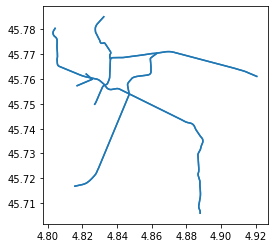

In [ ]:
#representation avec geopandas
metro.plot()

In [ ]:
#incrustation des lignes sur la carte folium
m=folium.Map(location = [45.76220,4.82186 ], zoom_start = 12)
folium.GeoJson(metro.geometry).add_to(m)
m

Les couleurs des lignes
- A (301A) : rose (magenta, "#FF00FF")
- B (302A) : bleu (cornflowerblue, "#6495ED")
- C (303) : orange (orange, "#FFA500")
- D (304) : vert foncé (green, "#00B300")
- funiculaire : vert clair (lightgreen, "#90EE90")

In [21]:
#création d'une nouvelle colonne avec les couleur
metro['couleur']=metro['ligne'].replace({'A': "#FF00FF","B":"#6495ED","C":"#FFA500","D":"#00B300","F1":"#90EE90","F2":"#90EE90"})
metro.head(1)

,ligne,code_trace,code_ligne,type_trace,nom_trace,sens,origine,destination,nom_origine,nom_destination,famille_transport,date_debut,date_fin,code_type_ligne,nom_type_ligne,pmr,code_tri_ligne,nom_version,last_update,last_update_fme,gid,geometry,couleur
0,F2,F2-1,326,NOM,Vieux Lyon - Fourviere,Aller,30049,30055,Vieux Lyon Cat.St Jean,Fourvière Basilique,FUN,20180101,,REG,Régulière,true,F 2,Avril 2021,2021-05-03T17:09:38+02:00,2021-08-05T06:00:27+02:00,23,"LINESTRING (4.82186 45.76220, 4.82505 45.76026...",#90EE90


In [ ]:
#création de la carte des lignes de metro avec les couleurs (https://gis.stackexchange.com/questions/394219/folium-draw-polygons-with-distinct-colours ; https://leafletjs.com/reference-1.6.0.html#path-option)
def style(feature):
        return {
            'fillColor': feature['properties']['couleur'],
            'color': feature['properties']['couleur'],
            'weight': 3
        }

m=folium.Map(location = [45.76220,4.82186 ], zoom_start = 12)
geojson=folium.GeoJson(metro, style_function=style)
geojson.add_to(m)
m

In [22]:
def style(feature):
        return {
            'fillColor': feature['properties']['couleur'],
            'color': feature['properties']['couleur'],
            'weight': 8
            }

m=folium.Map(location = [45.76220,4.82186 ], zoom_start = 12)
b = folium.GeoJson(metro,style_function=style,tooltip=folium.features.GeoJsonTooltip(fields=['ligne', 'nom_trace'], localize=True))
b.add_to(m)
m

#carte avec les lignes colorées et des tooltips le long de la ligne

##les entrées et sorties des stations de metro

In [ ]:
#récupération des stations de métro
link='https://download.data.grandlyon.com/wfs/rdata?SERVICE=WFS&VERSION=2.0.0&request=GetFeature&typename=tcl_sytral.tclstation&outputFormat=application/json;%20subtype=geojson&SRSNAME=EPSG:4171'
stations_metro=gpd.read_file(link)
stations_metro.head()

,id,id_station,nom,desserte,gid,last_update,last_update_fme,geometry
0,79849984335,50824,Mermoz-Pinel,"30185,30186",230,2021-07-20T02:31:18,2021-07-20T06:00:10,POINT (4.88698 45.73036)
1,79840085288,50621,Laënnec,30187,278,2021-07-20T02:31:18,2021-07-20T06:00:10,POINT (4.88612 45.73896)
2,79845585223,50622,Laënnec,30187,279,2021-07-20T02:31:18,2021-07-20T06:00:10,POINT (4.88679 45.73836)
3,79839085276,50623,Laënnec,30188,280,2021-07-20T02:31:18,2021-07-20T06:00:10,POINT (4.88598 45.73885)
4,79578986646,51811,Garibaldi,"30445,30446",124,2021-07-20T02:31:18,2021-07-20T06:00:10,POINT (4.85313 45.75192)


In [ ]:
stations_metro.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   id               160 non-null    object  
 1   id_station       160 non-null    object  
 2   nom              160 non-null    object  
 3   desserte         160 non-null    object  
 4   gid              160 non-null    object  
 5   last_update      160 non-null    object  
 6   last_update_fme  160 non-null    object  
 7   geometry         160 non-null    geometry
dtypes: geometry(1), object(7)
memory usage: 10.1+ KB


In [ ]:
#incrustion des stations sur la carte folium
folium.GeoJson(data=stations_metro).add_to(m)
m

In [ ]:
# this is the layer that eventually gets added to Map
layer = folium.FeatureGroup(name='Your layer with Markers', show=False)

    # load GEOJSON, but don't add it to anything
gj = folium.GeoJson(data=stations_metro)

    # iterate over GEOJSON features, pull out point coordinates, make Markers and add to layer
for feature in gj.data['features']:
  if feature['geometry']['type'] == 'Point':
    folium.Marker(location=list(reversed(feature['geometry']['coordinates'])),
                          icon=folium.Icon(
                              icon_color='blue',
                              icon='subway',
                              prefix='fa')
                          ).add_to(layer)

layer.add_to(m)
m

In [ ]:
# this is the layer that eventually gets added to Map
layer = folium.FeatureGroup(name='Your layer with Markers', show=False)

    # load GEOJSON, but don't add it to anything
gj = folium.GeoJson(data=stations_metro)

    # iterate over GEOJSON features, pull out point coordinates, make Markers and add to layer
for feature in gj.data['features']:
  if feature['geometry']['type'] == 'Point':
    folium.Marker(location=list(reversed(feature['geometry']['coordinates'])),
                          icon=folium.Icon(
                              icon_color='blue',
                              icon='subway',
                              prefix='fa'),
                          #popup=feature['properties']['nom']
                      tooltip= folium.Tooltip(feature['properties']['nom'])
                          ).add_to(layer)

layer.add_to(m)
m

In [ ]:
from folium import plugins

# this is the layer that eventually gets added to Map
layer = folium.FeatureGroup(name='Your layer with Markers', show=False)

    # load GEOJSON, but don't add it to anything
gj = folium.GeoJson(data=stations_metro)

    # iterate over GEOJSON features, pull out point coordinates, make Markers and add to layer
for feature in gj.data['features']:
  if feature['geometry']['type'] == 'Point':
    folium.Marker(location=list(reversed(feature['geometry']['coordinates'])),
                          icon=plugins.BeautifyIcon(border_color='blue',border_width=1),
                          #popup=feature['properties']['nom']
                      tooltip= folium.Tooltip(feature['properties']['nom'])
                          ).add_to(layer)

layer.add_to(m)
m

In [ ]:
gj.data['features']

[{'bbox': [4.886982714640664,
   45.73035966543131,
   4.886982714640664,
   45.73035966543131],
  'geometry': {'coordinates': [4.886982714640664, 45.73035966543131],
   'type': 'Point'},
  'id': '0',
  'properties': {'desserte': '30185,30186',
   'gid': '230',
   'id': '79849984335',
   'id_station': '50824',
   'last_update': '2021-07-19T02:31:18',
   'last_update_fme': '2021-07-19T06:00:12',
   'nom': 'Mermoz-Pinel'},
  'type': 'Feature'},
 {'bbox': [4.886115995815088,
   45.73896130311666,
   4.886115995815088,
   45.73896130311666],
  'geometry': {'coordinates': [4.886115995815088, 45.73896130311666],
   'type': 'Point'},
  'id': '1',
  'properties': {'desserte': '30187',
   'gid': '278',
   'id': '79840085288',
   'id_station': '50621',
   'last_update': '2021-07-19T02:31:18',
   'last_update_fme': '2021-07-19T06:00:12',
   'nom': 'Laënnec'},
  'type': 'Feature'},
 {'bbox': [4.886785131130891,
   45.73836263416282,
   4.886785131130891,
   45.73836263416282],
  'geometry': {'coor

##les stations de metro issues du fichier points d'arrets des transports de grand lyon

In [27]:
#utilisation du tableau suivant
pt_arrets_metro.head()

,id,nom,desserte,pmr,ascenseur,escalator,gid,last_update,last_update_fme,geometry,desserte_unique
362,46030,Place Jean Jaurès,302A:A,true,false,false,322,2021-08-05T02:31:22,2021-08-05T06:00:18,POINT (4.83756 45.73782),302A
363,46031,Debourg,302A:A,true,false,false,316,2021-08-05T02:31:22,2021-08-05T06:00:18,POINT (4.83392 45.73196),302A
364,46032,Debourg,302A:R,true,false,false,321,2021-08-05T02:31:22,2021-08-05T06:00:18,POINT (4.83402 45.73192),302A
389,644,Croix-Rousse,"303:A,303:R",true,true,true,338,2021-08-05T02:31:22,2021-08-05T06:00:15,POINT (4.83183 45.77446),303
428,42743,Hôtel de Ville L. Pradel,301A:R,true,false,false,118,2021-08-05T02:31:22,2021-08-05T06:00:18,POINT (4.83609 45.76731),301A


In [ ]:
# this is the layer that eventually gets added to Map
layer = folium.FeatureGroup(name='Your layer with Markers', show=False)

    # load GEOJSON, but don't add it to anything
gj = folium.GeoJson(data=pt_arrets_metro)

    # iterate over GEOJSON features, pull out point coordinates, make Markers and add to layer
for feature in gj.data['features']:
  if feature['geometry']['type'] == 'Point':
    folium.Marker(location=list(reversed(feature['geometry']['coordinates'])),
                          icon=folium.Icon(
                              icon_color='blue',
                              icon='subway',
                              prefix='fa'),
                          #popup=feature['properties']['nom']
                      tooltip= folium.Tooltip(feature['properties']['nom'])
                          ).add_to(layer)

layer.add_to(m)
m

In [28]:
#essai de faire des cercles et non des marqueurs pour les stations

# this is the layer that eventually gets added to Map
layer = folium.FeatureGroup(name='Your layer with Markers', show=False)

    # load GEOJSON, but don't add it to anything
gj = folium.GeoJson(data=pt_arrets_metro)

    # iterate over GEOJSON features, pull out point coordinates, make Markers and add to layer
for feature in gj.data['features']:
  if feature['geometry']['type'] == 'Point':
    folium.Circle(location=list(reversed(feature['geometry']['coordinates'])),
                          color="white",
                          fill=True,
                          fill_color="white",
                          fill_opacity=1,
                          radius=20,
                          #popup=feature['properties']['nom']
                      tooltip= folium.Tooltip(feature['properties']['nom'])
                          ).add_to(layer)

layer.add_to(m)
m

In [34]:
#essayer de mettre le logo de la ligne à chaque bout
#ligne A 
icon = folium.features.CustomIcon('https://upload.wikimedia.org/wikipedia/commons/thumb/e/e1/Lyon_tcl_metro-a.svg/72px-Lyon_tcl_metro-a.svg.png', icon_size=(20,20))
folium.Marker(location=[45.74975,4.82700],
              icon=icon
              ).add_to(m)

icon = folium.features.CustomIcon('https://upload.wikimedia.org/wikipedia/commons/thumb/e/e1/Lyon_tcl_metro-a.svg/72px-Lyon_tcl_metro-a.svg.png', icon_size=(20,20))
folium.Marker(location=[45.76102,4.92104 ],
              icon=icon
              ).add_to(m)

#ligne B
icon = folium.features.CustomIcon('https://upload.wikimedia.org/wikipedia/commons/thumb/9/94/Lyon_tcl_metro-b.svg/72px-Lyon_tcl_metro-b.svg.png', icon_size=(20,20))
folium.Marker(location=[45.77016,4.86283 ],
              icon=icon
              ).add_to(m)

icon = folium.features.CustomIcon('https://upload.wikimedia.org/wikipedia/commons/thumb/9/94/Lyon_tcl_metro-b.svg/72px-Lyon_tcl_metro-b.svg.png', icon_size=(20,20))
folium.Marker(location=[45.71667, 4.81450 ],
              icon=icon
              ).add_to(m)

#ligne C
icon = folium.features.CustomIcon('https://upload.wikimedia.org/wikipedia/commons/thumb/4/40/Lyon_tcl_metro-c.svg/72px-Lyon_tcl_metro-c.svg.png', icon_size=(20,20))
folium.Marker(location=[45.76813, 4.83596 ],
              icon=icon
              ).add_to(m)

icon = folium.features.CustomIcon('https://upload.wikimedia.org/wikipedia/commons/thumb/4/40/Lyon_tcl_metro-c.svg/72px-Lyon_tcl_metro-c.svg.png', icon_size=(20,20))
folium.Marker(location=[45.78525,4.83250 ],
              icon=icon
              ).add_to(m)

#ligne D
icon = folium.features.CustomIcon('https://upload.wikimedia.org/wikipedia/commons/thumb/c/c6/Lyon_tcl_metro-d.svg/72px-Lyon_tcl_metro-d.svg.png', icon_size=(20,20))
folium.Marker(location=[45.77979,4.80386 ],
              icon=icon
              ).add_to(m)

icon = folium.features.CustomIcon('https://upload.wikimedia.org/wikipedia/commons/thumb/c/c6/Lyon_tcl_metro-d.svg/72px-Lyon_tcl_metro-d.svg.png', icon_size=(20,20))
folium.Marker(location=[45.70556, 4.88808],
              icon=icon
              ).add_to(m)
m

## La carte finale

In [48]:
# carte totale
#initialisation de la carte folium sur Lyon
m=folium.Map(location = [45.76220,4.82186 ], zoom_start = 12)
#incrustation des lignes de metro et funiculaire
def style(feature):
        return {
            'fillColor': feature['properties']['couleur'],
            'color': feature['properties']['couleur'],
            'weight': 8
            }

m=folium.Map(location = [45.76220,4.82186 ], zoom_start = 12)
b = folium.GeoJson(metro,style_function=style,tooltip=folium.features.GeoJsonTooltip(fields=['ligne', 'nom_trace'], localize=True))
b.add_to(m)
#incrustation des points d'arrêt
gj = folium.GeoJson(data=pt_arrets_metro)
for feature in gj.data['features']:
  if feature['geometry']['type'] == 'Point':
    folium.Circle(location=list(reversed(feature['geometry']['coordinates'])),
                          color="white",
                          fill=True,
                          fill_color="white",
                          fill_opacity=1,
                          radius=20,
                          #popup=feature['properties']['nom']
                      tooltip= folium.Tooltip(feature['properties']['nom'])
                          ).add_to(m)
#incrustation des logo des lignes
#ligne A 
icon = folium.features.CustomIcon('https://upload.wikimedia.org/wikipedia/commons/thumb/e/e1/Lyon_tcl_metro-a.svg/72px-Lyon_tcl_metro-a.svg.png', icon_size=(20,20))
folium.Marker(location=[45.74975,4.82700],
              icon=icon
              ).add_to(m)

icon = folium.features.CustomIcon('https://upload.wikimedia.org/wikipedia/commons/thumb/e/e1/Lyon_tcl_metro-a.svg/72px-Lyon_tcl_metro-a.svg.png', icon_size=(20,20))
folium.Marker(location=[45.76102,4.92104 ],
              icon=icon
              ).add_to(m)

#ligne B
icon = folium.features.CustomIcon('https://upload.wikimedia.org/wikipedia/commons/thumb/9/94/Lyon_tcl_metro-b.svg/72px-Lyon_tcl_metro-b.svg.png', icon_size=(20,20))
folium.Marker(location=[45.77016,4.86283 ],
              icon=icon
              ).add_to(m)

icon = folium.features.CustomIcon('https://upload.wikimedia.org/wikipedia/commons/thumb/9/94/Lyon_tcl_metro-b.svg/72px-Lyon_tcl_metro-b.svg.png', icon_size=(20,20))
folium.Marker(location=[45.71667, 4.81450 ],
              icon=icon
              ).add_to(m)

#ligne C
icon = folium.features.CustomIcon('https://upload.wikimedia.org/wikipedia/commons/thumb/4/40/Lyon_tcl_metro-c.svg/72px-Lyon_tcl_metro-c.svg.png', icon_size=(20,20))
folium.Marker(location=[45.76813, 4.83596 ],
              icon=icon
              ).add_to(m)

icon = folium.features.CustomIcon('https://upload.wikimedia.org/wikipedia/commons/thumb/4/40/Lyon_tcl_metro-c.svg/72px-Lyon_tcl_metro-c.svg.png', icon_size=(20,20))
folium.Marker(location=[45.78525,4.83250 ],
              icon=icon
              ).add_to(m)

#ligne D
icon = folium.features.CustomIcon('https://upload.wikimedia.org/wikipedia/commons/thumb/c/c6/Lyon_tcl_metro-d.svg/72px-Lyon_tcl_metro-d.svg.png', icon_size=(20,20))
folium.Marker(location=[45.77979,4.80386 ],
              icon=icon
              ).add_to(m)

icon = folium.features.CustomIcon('https://upload.wikimedia.org/wikipedia/commons/thumb/c/c6/Lyon_tcl_metro-d.svg/72px-Lyon_tcl_metro-d.svg.png', icon_size=(20,20))
folium.Marker(location=[45.70556, 4.88808],
              icon=icon
              ).add_to(m)
#affichage de la carte
m


In [49]:
#sauvegarde de la carte
m.save("Lyon_carte_metro.html")

# Les lignes de Tramway

La plateforme data.grandlyon.com offre un accès à plusieurs centaines de jeux de données. Recherchez-les grâce à la recherche par mot-clé et par filtres : partenaire producteur de la donnée, thématique (environnement, transport…), format… Et explorez-les en accédant à leur page détaillée : cartographie, tableau textuel des données, description, lien de téléchargement et accès par API.

In [ ]:
link='https://download.data.grandlyon.com/ws/rdata/tcl_sytral.tcllignetram_2_0_0/all.json?maxfeatures=-1'
r = requests.get(link).json()
tramway=pd.json_normalize(r['values'])
tramway.head()

,type_trace,code_tri_ligne,code_trace,pmr,code_type_ligne,famille_transport,ligne,destination,code_ligne,origine,date_fin,gid,nom_destination,nom_trace,date_debut,sens,last_update_fme,last_update,nom_version,nom_type_ligne,nom_origine
0,NOM,T 2,T2-3,True,REG,TRA,T2,30835,T2,31290,None,25,Saint-Priest Bel Air,H. Region Montrochet - Saint-Priest Bel Air,20210301,Aller,2021-07-26 06:00:34+02:00,2021-05-03 17:09:38+02:00,Avril 2021,Régulière,H. Région Montrochet
1,NOM,T 2,T2-4,True,REG,TRA,T2,31290,T2,30835,None,26,H. Région Montrochet,Saint-Priest Bel Air - H. Region Montrochet,20210301,Retour,2021-07-26 06:00:34+02:00,2021-05-03 17:09:38+02:00,Avril 2021,Régulière,Saint-Priest Bel Air
2,NOM,T 7,T7-2,False,REG,TRA,T7,34568,T7,34567,None,24,Vaulx La Soie.,Decines - OL Vallee - Vaulx La Soie.,20201027,Retour,2021-07-26 06:00:34+02:00,2021-05-03 17:09:38+02:00,Avril 2021,Régulière,Décines - OL Vallée
3,NOM,T 3,T3-1,True,REG,TRA,T3,34289,T3,30547,None,15,Meyzieu les Panettes,Gare Part Dieu Villette - Meyzieu ZI / Meyzie...,20180101,Aller,2021-07-26 06:00:34+02:00,2021-05-03 17:09:38+02:00,Avril 2021,Régulière,Gare Part-Dieu
4,NOM,T 3,T3-2,True,REG,TRA,T3,30547,T3,34289,None,16,Gare Part-Dieu,Meyzieu ZI / Meyzieu les Panettes - Gare Part ...,20180101,Retour,2021-07-26 06:00:34+02:00,2021-05-03 17:09:38+02:00,Avril 2021,Régulière,Meyzieu les Panettes


In [ ]:
tramway["code_ligne"].unique().tolist()

['T2', 'T7', 'T3', 'T5', 'T1A', 'T4A', 'T6']

# les lignes de BUS

In [ ]:
link='https://download.data.grandlyon.com/ws/rdata/tcl_sytral.tcllignebus_2_0_0/all.json?maxfeatures=-1'
r = requests.get(link).json()
bus=pd.json_normalize(r['values'])
bus.head()

,type_trace,gid,destination,pmr,nom_type_ligne,code_type_ligne,nom_version,famille_transport,ligne,code_trace,code_ligne,origine,date_fin,nom_origine,nom_destination,sens,nom_trace,last_update_fme,last_update,code_tri_ligne,date_debut
0,NOM,359,31520,True,Régulière,REG,Avril 2021,BUS,C5,C5-2,C5A,10285,None,Cordeliers,Vancia Château Bérard,Aller,Cordeliers - Vancia Château Bérard,2021-07-26 06:00:35+02:00,2021-05-03 17:09:38+02:00,C 5,20180101
1,NOM,668,31760,True,Régulière,REG,Avril 2021,BUS,ZI4,ZI4-2,ZI4A,10228,None,Caluire Chemin Petit,Vaulx-en-Velin La Soie,Retour,Caluire Chemin Petit - Vaulx-en-Velin La Soie,2021-07-26 06:00:35+02:00,2021-05-03 17:09:38+02:00,Z I4,20180101
2,NOR,741,10487,True,Régulière,REG,Avril 2021,BUS,10,10-2,10D,11147,None,Porte de Lyon,Gare de Vaise,Retour,Porte de Lyon - Gare de Vaise,2021-07-26 06:00:35+02:00,2021-05-03 17:09:38+02:00,10,20200416
3,NOM,742,10524,True,Régulière,REG,Avril 2021,BUS,1E,1E-1,1EX,34351,None,Colombier-Saugn. Salines,Grange Blanche,Aller,Colombier Saugnieu Les Salines - Grange Blanche,2021-07-26 06:00:35+02:00,2021-05-03 17:09:38+02:00,1E,20180101
4,NOM,743,34351,True,Régulière,REG,Avril 2021,BUS,1E,1E-2,1EX,10524,None,Grange Blanche,Colombier-Saugn. Salines,Retour,Grange Blanche - Colombier Saugnieu Les Salines,2021-07-26 06:00:35+02:00,2021-05-03 17:09:38+02:00,1E,20180101


In [ ]:
bus["code_ligne"].unique().tolist()

['C5A',
 'ZI4A',
 '10D',
 '1EX',
 '20A',
 'C21A',
 '21A',
 'C25B',
 'C15E',
 '8B',
 '7A',
 '17B',
 '18B',
 'R3A',
 'ZI7A',
 'C18A',
 'C19A',
 '2A',
 'C24E',
 '3A',
 '33A',
 '65B',
 '26A',
 'ZI8A',
 '63A',
 '25A',
 '40A',
 '43A',
 '30B',
 '27A',
 '35A',
 '45B',
 '60A',
 '70A',
 '47A',
 '52A',
 '64A',
 '98G',
 '72C',
 '15F',
 '73D',
 '76A',
 '81A',
 '296',
 '80A',
 '77A',
 '78B',
 'C4A',
 '84A',
 '96A',
 'C11A',
 'GE4A',
 'C20E',
 'C26A',
 'S10A',
 'S9A',
 'ZI2A',
 'S8A',
 '5A',
 'S16A',
 'GE2A',
 'S15A',
 'ZI3A',
 '9B',
 '14B',
 '16A',
 '19A',
 '29A',
 '22A',
 '23A',
 'C20D',
 '24A',
 '28A',
 'C17A',
 '31A',
 '32A',
 '34A',
 '37A',
 'S7A',
 '39A',
 '38B',
 '11B',
 '12B',
 '46A',
 '48B',
 '49A',
 '50A',
 'PL1A',
 '54A',
 '55B',
 '57A',
 '66B',
 '2EX',
 '73E',
 '67A',
 '68B',
 '71A',
 '79A',
 '83A',
 '85A',
 '86A',
 '87A',
 '88B',
 '89D',
 '90B',
 '93A',
 '15C',
 'R2A',
 '95A',
 '97A',
 '100A',
 '10E',
 '69A',
 '111A',
 '112A',
 '115A',
 '118A',
 '61B',
 '62A',
 '132',
 '142A',
 '147',
 '

# Prochains passage

Les prochains passages sont les horaires estimés des deux prochaines dessertes de chaque ligne commerciale pour l'ensemble des arrêts du réseau TCL. Ces horaires sont issus des calculs en temps réel des Systèmes d'Aide à l'Exploitation (Edylic). Ces horaires sont associés aux identifiants de l'offre théorique (identifiant point d'arrêt, ligne commerciale et course).

https://data.grandlyon.com/jeux-de-donnees/prochains-passages-reseau-transports-commun-lyonnais-disponibilites-temps-reel/info


In [ ]:
#code fourni par data grand lyon (avec des modifications car ne fonctionnait pas)

import urllib.request, base64

# set basic information
username = 'laetitia.virlouvet@gmail.com'
password = 'qaw-EFV7gux1bnw3brq'
url = 'https://download.data.grandlyon.com/ws/rdata/tcl_sytral.tclalertetrafic_2/all.json?maxfeatures=100&start=1'

# prepare the request Object
request = urllib.request.Request(url)

# encode the username / password couple into a single base64 string
base64string = base64.encodestring(('%s:%s' % (username, password)).encode()).decode().strip()
print(base64string)

# then add this string into the Authorization header
request.add_header("Authorization", "Basic %s" % base64string)

# and open the url
result = urllib.request.urlopen(request)

##MAIS JE NE SAIS PAS QUOI FAIRE APRES

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: encodestring() is a deprecated alias since 3.1, use encodebytes()
  


bGFldGl0aWEudmlybG91dmV0QGdtYWlsLmNvbTpxYXctRUZWN2d1eDFibnczYnJx


In [ ]:
#code API avec authentification
# set basic information
username = 'laetitia.virlouvet@gmail.com'
password = 'qaw-EFV7gux1bnw3brq'
url = 'https://download.data.grandlyon.com/ws/rdata/tcl_sytral.tclpassagearret/all.json?maxfeatures=100&start=11'

import requests
from requests.auth import HTTPBasicAuth
r=requests.get(url, auth=HTTPBasicAuth(username, password))
r

<Response [200]>

In [ ]:
r=r.json()

In [ ]:
import pandas as pd

passage=pd.json_normalize(r['values'])
passage.head()

,idtarretdestination,coursetheorique,direction,ligne,delaipassage,heurepassage,gid,last_update_fme,type,id
0,46710,90B-016AZ:1:1:11,Valmy - Place Ferber,90B,17 min,2021-07-21 10:18:00,11,2021-07-21 10:01:05,E,6
1,46710,90B-016AZ:3:1:11,Valmy - Place Ferber,90B,42 min,2021-07-21 10:43:00,12,2021-07-21 10:01:05,E,6
2,42575,33A-030AI:5:1:7,Rillieux - Les Alagniers,33A,3 min,2021-07-21 10:04:10,13,2021-07-21 10:01:05,E,9
3,42575,33A-030AI:4:1:8,Rillieux - Les Alagniers,33A,23 min,2021-07-21 10:24:10,14,2021-07-21 10:01:05,E,9
4,37035,24A-029AZ:3:1:9,Sept Chemins,24A,13 min,2021-07-21 10:14:29,15,2021-07-21 10:01:05,E,15


In [ ]:
passage.shape

(100, 10)


### récupération via le csv

In [ ]:
#importation du fichier csv
from google.colab import files
uploaded = files.upload()

Saving tclpassagearret.csv to tclpassagearret.csv


In [ ]:
#lecture du fichier csv
passage = pd.read_csv("tclpassagearret.csv",sep=";")
passage.head()

,id,ligne,direction,delaipassage,type,heurepassage,idtarretdestination,coursetheorique
0,1,87A,Mions Bourdelle,34 min,E,2021-07-19 14:58:00,35998,87A-032AZ:2:1:24
1,1,87A,Mions Bourdelle,15h31,E,2021-07-19 15:31:00,35998,87A-032AZ:4:1:23
2,1,ZI1A,Saint-Priest Gare,15h45,T,2021-07-19 15:45:00,47263,ZI1A-067AM:2:2:2
3,2,87A,Gare de VÃ©nissieux,11 min,E,2021-07-19 14:35:10,11315,87A-032AZ:2:1:23
4,2,87A,Gare de VÃ©nissieux,38 min,E,2021-07-19 15:02:10,11315,87A-032AZ:4:1:22


## Automatisation de la récupération des données via schedule

In [ ]:
#installation de schedule
! pip install schedule

In [ ]:
import schedule
import time

In [ ]:
passage.columns.tolist()

NameError: ignored

In [ ]:
#initialisation d'un dataframe pandas vide
column_names = passage.columns.tolist()
df = pd.DataFrame(columns = column_names)
df

In [ ]:
#initialisation de la fin de la récupération des données
fin=datetime.now() + timedelta(minutes= 5)

In [ ]:
#définition d'une fonction pour récupérer les données
import requests,json
from requests.auth import HTTPBasicAuth
import pandas as pd
from datetime import datetime, timedelta

def retrieve_data():
  global df
  username = 'laetitia.virlouvet@gmail.com'
  password = 'qaw-EFV7gux1bnw3brq'
  url = 'https://download.data.grandlyon.com/ws/rdata/tcl_sytral.tclpassagearret/all.json?maxfeatures=-1&start=1'

  r=requests.get(url, auth=HTTPBasicAuth(username, password))
  data=r.json()
  passage=pd.json_normalize(data['values'])
  passage['Time_download']=(datetime.now() + timedelta(hours= 2)).strftime("%d_%H_%M")

  df=pd.concat([df,passage])

  return df

schedule.every(1).minutes.do(retrieve_data)

while datetime.now() < fin :
  schedule.run_pending()


In [ ]:
df

In [ ]:
df.to_csv("Lyon_transport_passage.csv",index=False)

l'ensemble de ce code a été mis dans un fichier .py via spider puis mis en route sur le terminal windows anaconda
 
"C:\Users\laeti\anaconda3\python.exe" C:\Users\laeti\Documents\Projet3_schedule_passage.py

Analyse des données sur le fichier prochain passage

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df['Time_download'].unique()

In [ ]:
#recup seulement les lignes de metro
df_metro=df[df["ligne"].isin(list_metro)]

In [ ]:
df_metro

In [ ]:
df_metro.to_csv("prochain_passage_metro.csv",index=False)

In [ ]:
from datetime import datetime, timedelta

print(datetime(2021,7,21,11,30,0))

2021-07-21 11:30:00


In [ ]:
from requests.auth import HTTPBasicAuth
username = 'laetitia.virlouvet@gmail.com'
password = 'qaw-EFV7gux1bnw3brq'
url1 = 'https://download.data.grandlyon.com/ws/rdata/tcl_sytral.tclalertetrafic_2/all.json?maxfeatures=-1&start=1'
r1=requests.get(url1, auth=HTTPBasicAuth(username, password))
data1=r1.json()
alerte=pd.json_normalize(data1['values'])
alerte.head()

,type,debut,ligne_com,mode,titre,ligne_cli,message,cause,last_update_fme,fin
0,Perturbation,2021-04-27 07:00:00,70A,Bus,Modification - Terminus Part-Dieu Jules Favre,70,L'arrêt Part-Dieu Vivier Merle n'est plus dess...,modification itinéraire,2021-07-22 17:55:02,2021-08-23 01:30:00
1,Perturbation majeure,2021-07-19 15:12:08,3A,Bus,Déviée direction Gorge de Loup uniquement.,3,Les arrêts Ecully Centre et La Vernique ne son...,travaux,2021-07-22 17:55:02,2021-07-27 01:30:00
2,Perturbation,2021-07-25 19:30:00,T2,Tramway,Terminus Centre Berthelot - Travaux sur les v...,T2,Les stations de Hôtel Région Montrochet à Perr...,travaux,2021-07-22 17:55:02,2021-07-26 02:00:00
3,Perturbation,2021-07-22 19:30:00,T2,Tramway,Terminus Centre Berthelot - Travaux sur les v...,T2,Les stations de Hôtel Région Montrochet à Perr...,travaux,2021-07-22 17:55:02,2021-07-23 02:00:00
4,Perturbation,2021-07-28 19:30:00,T2,Tramway,Terminus Centre Berthelot - Travaux sur les v...,T2,Les stations de Hôtel Région Montrochet à Perr...,travaux,2021-07-22 17:55:02,2021-07-29 02:00:00


In [ ]:
alerte.columns


Index(['type', 'debut', 'ligne_com', 'mode', 'titre', 'ligne_cli', 'message',
       'cause', 'last_update_fme', 'fin'],
      dtype='object')

In [ ]:
from datetime import datetime, timedelta
print(datetime(2021,7,22,19,34,0,1))

2021-07-22 19:34:00.000001


In [ ]:
print(datetime.now())

2021-07-22 18:41:37.631607


In [ ]:
##Obs données alerte trafic

In [ ]:
#code API avec authentification
# set basic information
username = 'laetitia.virlouvet@gmail.com'
password = 'qaw-EFV7gux1bnw3brq'
url = 'https://download.data.grandlyon.com/ws/rdata/tcl_sytral.tclalertetrafic_2/all.json?maxfeatures=-1&start=1'

import requests
from requests.auth import HTTPBasicAuth
r=requests.get(url, auth=HTTPBasicAuth(username, password))
r

In [ ]:
#importation du fichier csv
from google.colab import files
uploaded = files.upload()

Saving gtfs-tcl.zip.geojson to gtfs-tcl.zip.geojson


In [ ]:
name='gtfs-tcl.zip.geojson'
transport = gpd.read_file(name)
transport.head(20)

,description,id,name,wheelchair_boarding,parent_station,geometry
0,,S30087,Genay Proulieu,unknown,None,POINT (4.84507 45.90372)
1,,S11102,Pierre-Bénite Centre,unknown,None,POINT (4.82110 45.70308)
2,,10169,Austerlitz,available,S10045,POINT (4.83490 45.77574)
3,,S20456,Corneille,unknown,None,POINT (4.92830 45.75545)
4,,S33260,Joconde,unknown,None,POINT (4.78937 45.75242)
5,,12120,Gare de Vaise,available,S5103,POINT (4.80495 45.78130)
6,,2607,Rillieux Piscine,available,S11223,POINT (4.88765 45.81608)
7,,43999,Mions Centre,available,S33000,POINT (4.95644 45.66409)
8,,S10284,Corbas Rue du Midi,unknown,None,POINT (4.89869 45.66011)
9,,S33413,Vaulx - Résistance,unknown,None,POINT (4.91975 45.78581)


## trafic alerte

In [ ]:
import pandas as pd

In [ ]:
#code API avec authentification
# set basic information
username = 'laetitia.virlouvet@gmail.com'
password = 'qaw-EFV7gux1bnw3brq'
url = 'https://download.data.grandlyon.com/ws/rdata/tcl_sytral.tclalertetrafic_2/all.json?maxfeatures=-1&start=1'

import requests
from requests.auth import HTTPBasicAuth
r=requests.get(url, auth=HTTPBasicAuth(username, password))
data=r.json()
alerte_trafic =pd.json_normalize(data, ["values"])
alerte_trafic.columns

Index(['cause', 'debut', 'ligne_com', 'mode', 'titre', 'ligne_cli', 'message',
       'type', 'last_update_fme', 'fin'],
      dtype='object')

# arret en coordinates

In [ ]:
import json

In [ ]:
link='https://download.data.grandlyon.com/wfs/rdata?SERVICE=WFS&VERSION=2.0.0&request=GetFeature&typename=tcl_sytral.tclarret&outputFormat=application/json;%20subtype=geojson&SRSNAME=EPSG:4171'
r=requests.get(link)
r

<Response [200]>

In [ ]:
data = json.loads( r.text)
data

{'features': [{'geometry': {'coordinates': [4.886919353924966,
     45.73062331369464],
    'type': 'Point'},
   'properties': {'ascenseur': 'false',
    'desserte': 'C15E:A',
    'escalator': 'false',
    'gid': '11039',
    'id': '47600',
    'last_update': '2021-07-29 02:31:18',
    'last_update_fme': '2021-07-29 06:00:29',
    'nom': 'Mermoz - Pinel',
    'pmr': 'true'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [4.92324822585478, 45.774002778229594],
    'type': 'Point'},
   'properties': {'ascenseur': 'false',
    'desserte': '57A:A',
    'escalator': 'false',
    'gid': '11026',
    'id': '47671',
    'last_update': '2021-07-29 02:31:18',
    'last_update_fme': '2021-07-29 06:00:29',
    'nom': 'Foucaud - Picasso',
    'pmr': 'false'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [4.751738018531494, 45.7771513286027],
    'type': 'Point'},
   'properties': {'ascenseur': 'false',
    'desserte': '5A:A,86A:A',
    'escalator': 'false',
    'gid': '10753',
    

In [ ]:
data['features'][0]["geometry"]["coordinates"][::-1]

[45.73062331369464, 4.886919353924966]

In [ ]:
df=pd.DataFrame()
list_coord=[]
for i in range(len(data['features'])):
    coord=data['features'][i]["geometry"]["coordinates"][::-1]
    list_coord.append(coord)
    for g,h in data['features'][i]["properties"].items():
      df.loc[i,g]=h
df["coordinates"]=list_coord
df

,id,nom,desserte,pmr,ascenseur,escalator,gid,last_update,last_update_fme,coordinates
0,47600,Mermoz - Pinel,C15E:A,true,false,false,11039,2021-07-29 02:31:18,2021-07-29 06:00:29,"[45.73062331369464, 4.886919353924966]"
1,47671,Foucaud - Picasso,57A:A,false,false,false,11026,2021-07-29 02:31:18,2021-07-29 06:00:29,"[45.774002778229594, 4.92324822585478]"
2,47784,Les Halles 102 - 104,"5A:A,86A:A",false,false,false,10753,2021-07-29 02:31:18,2021-07-29 06:00:29,"[45.7771513286027, 4.751738018531494]"
3,47785,Les Halles 102 - 104,"5A:R,86A:R",false,false,false,10754,2021-07-29 02:31:18,2021-07-29 06:00:29,"[45.77700631049046, 4.751634017929973]"
4,47796,Rochette Cercle d'Aviron,S5A:A,false,false,false,10881,2021-07-29 02:31:18,2021-07-29 06:00:29,"[45.79111591478002, 4.823617023076824]"
...,...,...,...,...,...,...,...,...,...,...
4683,47246,Corbas Musee Aviation,112A:A,false,false,false,9280,2021-07-29 02:31:18,2021-07-29 06:00:28,"[45.653863513331025, 4.905645311172353]"
4684,47247,Corbas Musee Aviation,112A:R,false,false,false,9281,2021-07-29 02:31:18,2021-07-29 06:00:28,"[45.653969543087996, 4.905661292462854]"
4685,47248,Ratabizet,29A:A,false,false,false,9300,2021-07-29 02:31:18,2021-07-29 06:00:28,"[45.71640628578095, 4.977020200311657]"
4686,47250,Pagere Vivaldi,24A:A,true,false,false,9357,2021-07-29 02:31:18,2021-07-29 06:00:28,"[45.745985108802785, 4.915800358445829]"


In [ ]:
#selection ligne 302A
df_302A=df[df["desserte"].str.contains("302A")]
df_302A


,id,nom,desserte,pmr,ascenseur,escalator,gid,last_update,last_update_fme,coordinates
536,46030,Place Jean Jaurès,302A:A,true,false,false,322,2021-07-29 02:31:18,2021-07-29 06:00:28,"[45.73781993155152, 4.837557611706456]"
537,46031,Debourg,302A:A,true,false,false,316,2021-07-29 02:31:18,2021-07-29 06:00:28,"[45.731960104407335, 4.833923826440074]"
538,46032,Debourg,302A:R,true,false,false,321,2021-07-29 02:31:18,2021-07-29 06:00:28,"[45.73192185006432, 4.834024916490808]"
541,46028,Jean Macé,302A:A,true,false,false,286,2021-07-29 02:31:18,2021-07-29 06:00:28,"[45.746144351787635, 4.84247429605042]"
570,46026,Place Guichard,302A:A,true,false,false,91,2021-07-29 02:31:18,2021-07-29 06:00:28,"[45.75935936609615, 4.847654250342736]"
571,46027,Place Guichard,302A:R,true,false,false,92,2021-07-29 02:31:18,2021-07-29 06:00:28,"[45.7594333137236, 4.847567607468766]"
585,46033,Stade de Gerland Le LOU,302A:A,true,false,false,311,2021-07-29 02:31:18,2021-07-29 06:00:28,"[45.72736405030933, 4.831337682020671]"
703,46023,Brotteaux,302A:R,true,false,false,16,2021-07-29 02:31:18,2021-07-29 06:00:28,"[45.76685587653435, 4.859365997733373]"
704,46025,Gare Part-Dieu V.Merle,302A:A,true,false,false,531,2021-07-29 02:31:18,2021-07-29 06:00:28,"[45.76168293762747, 4.857238319547681]"
762,46036,Gare d'Oullins,"302A:A,302A:R",true,false,false,749,2021-07-29 02:31:18,2021-07-29 06:00:28,"[45.71670135868256, 4.814522741312713]"


# Carte du trajet sur la ligne B

In [50]:
from google.colab import files
files.upload()

Output hidden; open in https://colab.research.google.com to view.

In [52]:
df=pd.read_csv('/content/Lyon_passage_proche_samTOmar.csv')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21972 entries, 0 to 21971
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   code_ligne       21972 non-null  object
 1   coursetheorique  21972 non-null  object
 2   direction        21972 non-null  object
 3   delaipassage     21972 non-null  object
 4   heurepassage     21972 non-null  object
 5   id               21972 non-null  int64 
 6   nom              21972 non-null  object
 7   desserte         21972 non-null  object
 8   escalator        21972 non-null  bool  
 9   ascenseur        21972 non-null  bool  
 10  arret_ordre      21972 non-null  object
 11  coordinates      21972 non-null  object
 12  day              21972 non-null  int64 
 13  hours            21972 non-null  int64 
dtypes: bool(2), int64(3), object(9)
memory usage: 2.1+ MB


In [54]:
#ligne B
df_B=df[df['code_ligne']=='302A']
df_B.head()

,code_ligne,coursetheorique,direction,delaipassage,heurepassage,id,nom,desserte,escalator,ascenseur,arret_ordre,coordinates,day,hours
11,302A,302A-0306I:54:1:17,Charpennes Charles Hernu,Proche,2021-07-24 13:08:20,31663,Place Jean Jaurès,302A:R,True,True,6,"[45.73787144023908, 4.837431406149923]",24,13
13,302A,302A-0306I:51:1:46,Charpennes Charles Hernu,Proche,2021-07-24 13:07:45,46024,Gare Part-Dieu V.Merle,302A:R,False,False,2,"[45.76155647278447, 4.85725824568316]",24,13
28,302A,302A-0306I:54:1:17,Charpennes Charles Hernu,Proche,2021-07-24 13:14:45,46024,Gare Part-Dieu V.Merle,302A:R,False,False,2,"[45.76155647278447, 4.85725824568316]",24,13
29,302A,302A-0306I:55:1:15,Gare d'Oullins,Proche,2021-07-24 13:14:55,46030,Place Jean Jaurès,302A:A,False,False,6,"[45.73781993155152, 4.837557611706456]",24,13
41,302A,302A-0306I:51:1:47,Gare d'Oullins,Proche,2021-07-24 13:17:15,46026,Place Guichard,302A:A,False,False,3,"[45.75935936609615, 4.847654250342736]",24,13


In [ ]:
#les courses théorique entre 16h et 17h le mardi 27
df_B[(df_B['heurepassage']>'2021-07-27 16:00:00') & (df_B['heurepassage']<'2021-07-27 17:00:00')]["coursetheorique"].unique()

array(['302A-030CJ:59:1:7', '302A-030CJ:57:1:47', '302A-030CJ:52:1:56',
       '302A-030CJ:53:1:56', '302A-030CJ:51:1:59', '302A-030CJ:55:1:52',
       '302A-030CJ:59:1:8', '302A-030CJ:54:1:56', '302A-030CJ:52:1:58',
       '302A-030CJ:57:1:48', '302A-030CJ:53:1:58', '302A-030CJ:55:1:53',
       '302A-030CJ:54:1:57', '302A-030CJ:51:1:61', '302A-030CJ:59:1:10',
       '302A-030CJ:52:1:59', '302A-030CJ:53:1:59', '302A-030CJ:57:1:50',
       '302A-030CJ:55:1:55', '302A-030CJ:51:1:62', '302A-030CJ:54:1:59',
       '302A-030CJ:59:1:11', '302A-030CJ:57:1:51', '302A-030CJ:52:1:61',
       '302A-030CJ:55:1:56', '302A-030CJ:53:1:61', '302A-030CJ:54:1:60',
       '302A-030CJ:51:1:64'], dtype=object)

In [ ]:
#choisir une course theorique complete le mardi 27
df_B_theo=df_B[(df_B['coursetheorique']=='302A-030CJ:51:1:59') & (df['day']==27)]
df_B_theo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,code_ligne,coursetheorique,direction,delaipassage,heurepassage,id,nom,desserte,escalator,ascenseur,arret_ordre,coordinates,day,hours
18515,302A,302A-030CJ:51:1:59,Gare d'Oullins,Proche,2021-07-27 16:01:35,30472,Charpennes,"302A:A,302A:R",True,True,0,"[45.77016349207394, 4.862828581248771]",27,16
18534,302A,302A-030CJ:51:1:59,Gare d'Oullins,Proche,2021-07-27 16:02:35,46022,Brotteaux,302A:A,False,False,1,"[45.76691593355912, 4.859497367265485]",27,16
18548,302A,302A-030CJ:51:1:59,Gare d'Oullins,Proche,2021-07-27 16:03:50,46025,Gare Part-Dieu V.Merle,302A:A,False,False,2,"[45.76168293762747, 4.857238319547681]",27,16
18575,302A,302A-030CJ:51:1:59,Gare d'Oullins,Proche,2021-07-27 16:07:50,30133,Saxe - Gambetta,302A:A,True,True,4,"[45.75368255951363, 4.846954650872559]",27,16
18609,302A,302A-030CJ:51:1:59,Gare d'Oullins,Proche,2021-07-27 16:08:50,46028,Jean Macé,302A:A,False,False,5,"[45.746144351787635, 4.84247429605042]",27,16
18622,302A,302A-030CJ:51:1:59,Gare d'Oullins,Proche,2021-07-27 16:10:25,46030,Place Jean Jaurès,302A:A,False,False,6,"[45.73781993155152, 4.837557611706456]",27,16
18640,302A,302A-030CJ:51:1:59,Gare d'Oullins,Proche,2021-07-27 16:11:55,46031,Debourg,302A:A,False,False,7,"[45.731960104407335, 4.833923826440074]",27,16
18683,302A,302A-030CJ:51:1:59,Gare d'Oullins,Proche,2021-07-27 16:13:40,46033,Stade de Gerland Le LOU,302A:A,False,False,8,"[45.72736405030933, 4.831337682020671]",27,16


In [ ]:
df_B_theo['heurepassage'].tolist()

['2021-07-27 16:01:35',
 '2021-07-27 16:02:35',
 '2021-07-27 16:03:50',
 '2021-07-27 16:07:50',
 '2021-07-27 16:08:50',
 '2021-07-27 16:10:25',
 '2021-07-27 16:11:55',
 '2021-07-27 16:13:40']

In [ ]:
#times format EPOCH
[1627401695, 1627401755, 1627401830, 1627402070, 1627402130, 1627402225, 1627402315, 1627402420 ]

In [ ]:
coord=df_B_theo['coordinates'].apply(lambda x: json.loads(x)).tolist()

In [ ]:
[coord[i][::-1] for i in range(0,len(coord))]

[[4.862828581248771, 45.77016349207394],
 [4.859497367265485, 45.76691593355912],
 [4.857238319547681, 45.76168293762747],
 [4.846954650872559, 45.75368255951363],
 [4.84247429605042, 45.746144351787635],
 [4.837557611706456, 45.73781993155152],
 [4.833923826440074, 45.731960104407335],
 [4.831337682020671, 45.72736405030933]]

In [ ]:
m = folium.Map(location=[45.77016349207394, 4.862828581248771], zoom_start=13)
lines = [
    {
        'coordinates': [
            [4.862828581248771, 45.77016349207394],
            [4.859497367265485, 45.76691593355912],
        ],
        'dates': [
            '2021-07-27T16:01:35',
            '2021-07-27T16:02:35'
        ]
    },
    {
        'coordinates': [
            [4.859497367265485, 45.76691593355912],
            [4.857238319547681, 45.76168293762747],
        ],
        'dates': [
            '2021-07-27T16:02:35',
            '2021-07-27T16:03:50'
        ],
    },
    {
        'coordinates': [
            [4.857238319547681, 45.76168293762747],
            [4.846954650872559, 45.75368255951363],
        ],
        'dates': [
            '2021-07-27T16:03:50',
            '2021-07-27T16:07:50'
        ],
    },
    {
        'coordinates': [
            [4.846954650872559, 45.75368255951363],
            [4.84247429605042, 45.746144351787635],
        ],
        'dates': [
            '2021-07-27T16:07:50',
            '2021-07-27T16:08:50'
        ],
    },
    {
        'coordinates': [
            [4.84247429605042, 45.746144351787635],
            [4.837557611706456, 45.73781993155152],
        ],
        'dates': [
            '2021-07-27T16:08:50',
            '2021-07-27 16:10:25'
        ],
    },
    {
        'coordinates': [
            [4.837557611706456, 45.73781993155152],
            [4.833923826440074, 45.731960104407335],
        ],
        'dates': [
            '2021-07-27 16:10:25',
            '2021-07-27 16:11:55'
        ],
    },
    {
        'coordinates': [
            [4.833923826440074, 45.731960104407335],
            [4.831337682020671, 45.72736405030933],
        ],
        'dates': [
            '2021-07-27 16:11:55',
            '2021-07-27 16:13:40'
        ],
    },
]

features = [
    {
        'type': 'Feature',
        'geometry': {
            'type': 'LineString',
            'coordinates': line['coordinates'],
        },
        'properties': {
            'times': line['dates'],
            'style': {
                'color': 'blue'},
        }
    }
    for line in lines
]

TimestampedGeoJson({
    'type': 'FeatureCollection',
    'features': features,
}, period='PT1M', add_last_point=True).add_to(m)

m.save('Trajet_metro_B.html')
m